# Example notebook 

This notebook is a copy from `examples/getting_started/0_Getting_started/0_Getting_started.ipynb` with a small modification to use with [Papermill](https://github.com/nteract/papermill)


## Papermill parameters
Papermill is a tool for parameterizing, executing, and analyzing Jupyter Notebooks. To parameterize a notebook, we need tag a cell to use for parameters. We can only tag one cell, and for not we only use integer paramters. 
Full instructions are available here https://papermill.readthedocs.io/en/latest/usage-parameterize.html#designate-parameters-for-a-cell. 

Below, we tag the parameter `shots=1000`. We can then run the notebook as usual cell-by-cell to see the results. 

In [1]:
# Papermill parameters
shots = 1000

# AWS Braket Parameters
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
results_dir = "."

In [2]:
# Parameters
shots = 500
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
results_dir = "/opt/braket/model"


# Getting started with Amazon Braket

In this hello-world tutorial we prepare a maximally entangled Bell state between two qubits. We then run our circuit on a local simulator and obtain the results.

**In the following cell, we add a tag called `parameters` for Papermill to recognize.**

In [3]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator
from braket.aws import AwsDevice

## Build a circuit

Let's build a Bell state with two qubits. By calling `Circuit()` we create an empty circuit, and we can just add gates to the circuit. 

In [4]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)

## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [5]:
# set up device
device = AwsDevice(device_arn)
# device = LocalSimulator()

# run circuit
result = device.run(bell, shots=shots).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 269, '00': 231})


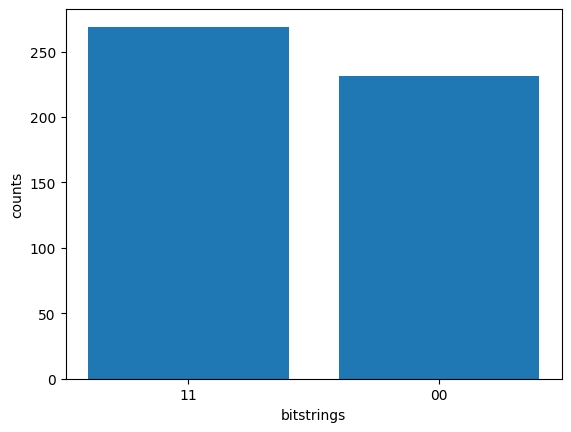

In [6]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [7]:
plt.savefig(f"{results_dir}/histogram.png")

<Figure size 640x480 with 0 Axes>